<a href="https://colab.research.google.com/github/CalebAnderson22/PHY122/blob/main/ErrorLab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 4

Caleb Anderson

16 November 2024

# Import Stuff

In [768]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy.random import normal as random_normal
from numpy import arange, sort, searchsorted, exp, sqrt
from numpy import sum as Σ

π = np.pi

def Normal(x, μ, σ):
    ## a.k.a. Gaussian-function given: domain x and two parameters μ, σ
    return exp( - (x-μ)**2/(2*σ**2) ) / sqrt(2*π*σ**2)

def get_histogram(x, data, normalize=False):
    ### binary-search of sorted data for-all domains.
    ### let: N = len(data), then: O ~ (N + len(x))log(N)
    out = searchsorted( sort(data), x, side="right")
    if normalize:
        return x[1:] + (x[:-1] - x[1:])/2, (out[1:] - out[:-1])/len(data)
    return x[1:] + (x[:-1] - x[1:])/2, out[1:] - out[:-1]

def ExpectationValue(X):
    return np.sum(X)/len(X)

def RMSD(f1, f2):
    """
    Root-Mean-Square-Deviation
    compare two functions
    """
    return sqrt( (  Σ( (f1 - f2)**2 )  ) / (len(f1)) )

# Gaussian-Functions

Plot 3 Gaussian-functions using the above defintion

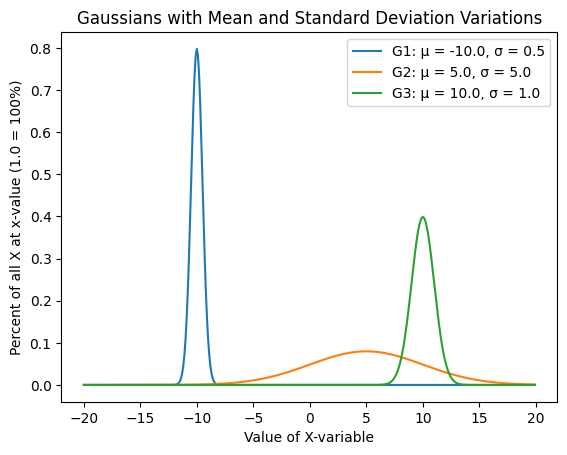

In [769]:
dx = 0.1
x  = arange(-20,20,dx)

plt.plot( x , Normal(x,-10.0, 0.5), label="G1: μ = -10.0, σ = 0.5")
plt.plot( x , Normal(x, 5.0, 5.0), label="G2: μ = 5.0, σ = 5.0" )
plt.plot( x , Normal(x, 10.0, 1.0), label="G3: μ = 10.0, σ = 1.0" )
plt.xlabel("Value of X-variable")
plt.ylabel("Percent of all X at x-value (1.0 = 100%)")
plt.legend(loc="upper right")
plt.title("Gaussians with Mean and Standard Deviation Variations")
plt.show()

Here I have plotted three Gaussian distributions, each with a different mean (μ) and standard deviation (σ). You can tell these are Gaussian distributions because they are symmetrical and via an eye test (at least of the more narrow distributions) the area under the curves equals 1.0. Of course, I know that for sure because they have been defined as such, but it is worth taking note of how that fact can still be appreciated graphically. You can see that G1, G2, and G3 are all centered symmetrically around their mean. You can also see that distributions with smaller standard deviations (G1, G2) have more of their values within a smaller range, making the occureence of X-values at and close to the mean much more frequent; the opposite is true and shown for a distribution with a larger standard deviation (G3).

# Random Variables

Let's use the following convention:


*   random-variables are denoted by CAPITAL letters (e.g. $A$, $B$, $F$, etc.)
*   arbitrarily-well-known-constants are denoted by lowercase letters (e.g. $a$, $b$, $f$, etc.)
*   variables are denoted by GΓΣΣΚ (Greek) letters (e.g. $\mu$, $\sigma$)




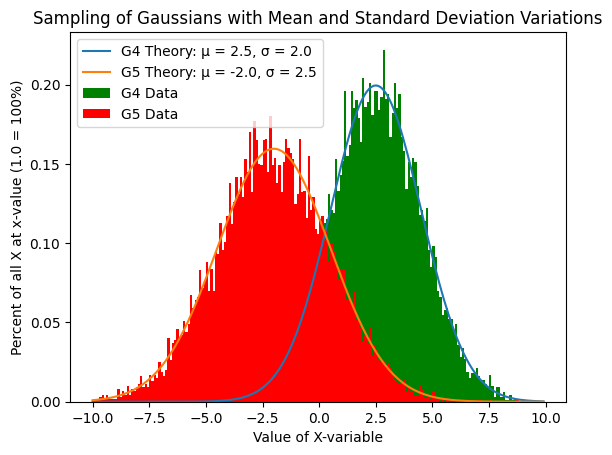

In [770]:
## Gaussian-function parameters
μ1 =  2.5
σ1 =  2.0
μ2 = -2.0
σ2 =  2.5

## domain
dx = 0.1
x  = arange(-10,10,dx)

## define random variables
n = 10000 ## number of samples collected
A = random_normal(μ1, σ1, n) ## random variable A
B = random_normal(μ2, σ2, n) ## random variable B

## make histograms of the random variables
y, h4 = get_histogram(x, A, normalize=True)
y, hB = get_histogram(x, B, normalize=True)

## plot histograms with overlied continuous representation
plt.bar(  y , h4/dx, label="G4 Data", color="g", width=0.1)
plt.bar(  y , hB/dx, label="G5 Data", color="r", width=0.1)
plt.plot( x , Normal(x, μ1, σ1), label="G4 Theory: μ = 2.5, σ = 2.0")
plt.plot( x , Normal(x, μ2, σ2), label="G5 Theory: μ = -2.0, σ = 2.5")
plt.xlabel("Value of X-variable")
plt.ylabel("Percent of all X at x-value (1.0 = 100%)")
plt.title("Sampling of Gaussians with Mean and Standard Deviation Variations")
plt.legend()
plt.show()

Here I have again plotted various Gaussians (G4, G5). I have also plotted a generated histogram for these distributions, as the program sampled G4 and G5 10000 times each and plotted the actual number of X = x in its sample. You can see that the data still generally follows the distribution of its respective Gaussian, though there are some values that are over- and underrepresented within the set than 'theory' (the Gaussian) would predict. The physical importance of this is to show that just the act of sampling intoduces variance to a theory that is otherwise infinitely precise and certain (the continuous functions G4 and G5). Thus, as a physical, data-driven science, physics must take seriously sources of error within its empirical results; higher confidence around a result should not be presented than the margin of error allows.

# $F = aA$

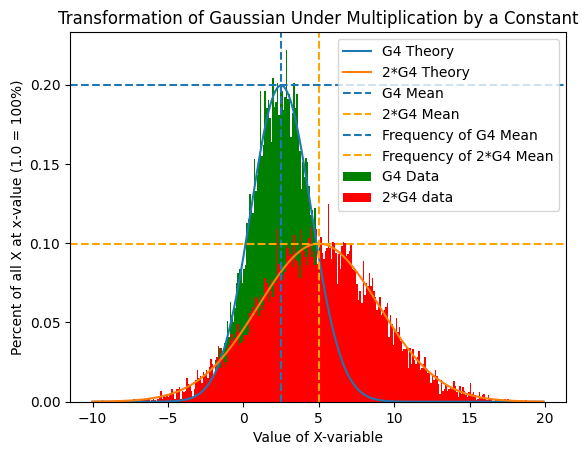

G4 μ Freq/2 == 2*G4 μ Freq = True
RMSD = 0.04403580447839994


In [771]:
a = 2.0 ## constant
dx = 0.1
x  = arange(-10,20,dx)

bins, hA = get_histogram(x, a*A, normalize=True)
σ     = sqrt(a**2 * σ1**2)
μ     = a * μ1

plt.bar(y, h4/dx, label="G4 Data", color="g", width=0.1)
plt.bar(bins, hA/dx, label="2*G4 data", color="r", width=0.1)
plt.plot(x , Normal(x, μ1, σ1), label="G4 Theory")
plt.plot(x, Normal(x, μ, σ), label="2*G4 Theory")
plt.axvline(μ1, linestyle="dashed", label="G4 Mean")
plt.axvline(μ, linestyle="dashed", color="orange", label="2*G4 Mean")
plt.axhline(max(Normal(x, μ1, σ1)), linestyle="dashed", label="Frequency of G4 Mean")
plt.axhline(max(Normal(x, μ, σ)), linestyle="dashed", color="orange", label="Frequency of 2*G4 Mean")
plt.xlabel("Value of X-variable")
plt.ylabel("Percent of all X at x-value (1.0 = 100%)")
plt.title("Transformation of Gaussian Under Multiplication by a Constant")
plt.legend()
plt.show()

print("G4 μ Freq/2 == 2*G4 μ Freq = " + str((max(Normal(x, μ, σ))==max(Normal(x, μ1, σ1))/a)))

print("RMSD = " + str(RMSD(Normal(bins, μ, σ)*dx, hA/dx)))

Here I explore how linear multiplication of a Gaussian creates another Gaussian with specific transformations of its parent's mean and standard deviation. Theoretically, the linear multiplication holds simply for the mean, and this is is easily apprehended graphically as for G4 μ = 2.5 but for 2*G4 μ = 5.0. In this case, the linear multiplication also held simply for the standard deviation because it was a positive value, though in general the new value is the square root of the product of the old σ and the constant of multiplication, each squared prior to their multiplication. We can not observe this effect directly, but a graphical artifact of the doubled standard deviation is that the frequency of the new mean is half that of the old mean. I add an additional calculation of the RMSD between our new function and its sample. The RMSD is small, meaning the correlation between our sample and its theory is significant.

# $F = A + B$

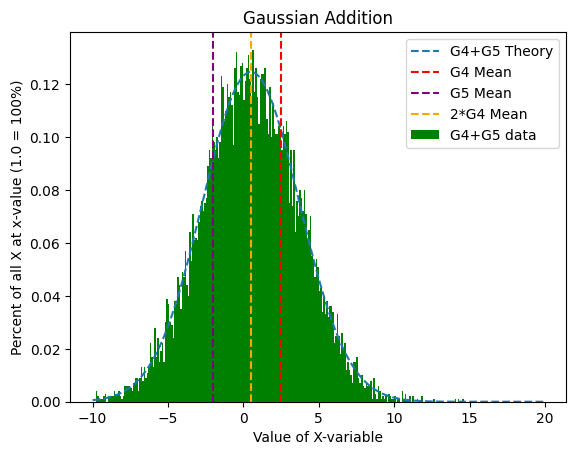

RMSD = 0.0049074191233749636


In [772]:
bins, hAB = get_histogram(x, A+B, normalize=True)

σ = sqrt(σ1**2 + σ2**2)
μ = μ1 + μ2

plt.bar( bins , hAB/dx, label="G4+G5 data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ), linestyle="dashed", label="G4+G5 Theory")
plt.axvline(μ1, linestyle="dashed", label="G4 Mean", color="red")
plt.axvline(μ2, linestyle="dashed", label="G5 Mean", color="purple")
plt.axvline(μ, linestyle="dashed", color="orange", label="2*G4 Mean")
plt.xlabel("Value of X-variable")
plt.ylabel("Percent of all X at x-value (1.0 = 100%)")
plt.title("Gaussian Addition")
plt.legend()
plt.show()

print("RMSD = " + str(RMSD(Normal(bins, μ, σ), hAB/dx)))

Here I have plotted the Gaussian G4+G5 and a histogram of its sample. The proof of the transformation theory (different for addition of functions than multiplication by constant, but still well known) once again lies in the small RMSD between the two. However, we can still easily graphically observe the rule that means add together, as G4+G5 μ = 0.5, G4 μ = 2.5, and G5 μ = -2.0.

# $F = aA + bB$

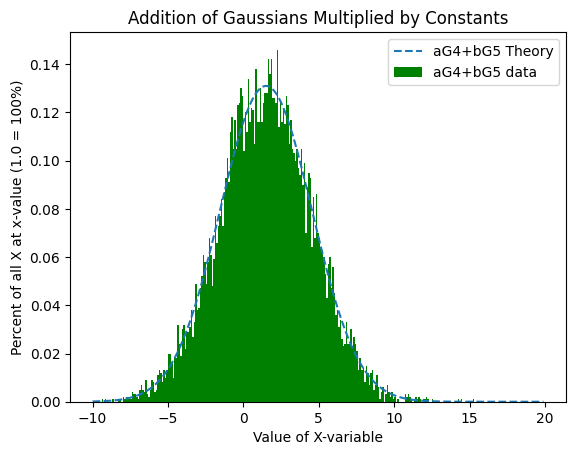

RMSD = 0.005322485344224112


In [773]:
## constants considered
a = 1.20
b = 0.75

bins, hAB = get_histogram(x, a*A+b*B, normalize=True)
μ = a*μ1 + b*μ2
σ = sqrt( a**2 * σ1**2 + b**2 * σ2**2 )   ## error propagation here

## plot
plt.bar( bins , hAB/dx, label="aG4+bG5 data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ), linestyle="dashed", label="aG4+bG5 Theory")
plt.xlabel("Value of X-variable")
plt.ylabel("Percent of all X at x-value (1.0 = 100%)")
plt.title("Addition of Gaussians Multiplied by Constants")
plt.legend()
plt.show()

print("RMSD = " + str(RMSD(Normal(bins, μ, σ), hAB/dx)))

Again, we see a small RMSD, which is a close match between the sample and the theory. There are no easily apprehended graphical artifacts to illustrate that the well-known relationships between means and standard deviations under transformation hold. However, we can again consider the physical relevance of this calculation. For this graph, we do not just consider the non-zero RMSD between the histogram and the theory as proof of unavoidable uncertainty in data collection; we can also consider what the *theory* is for this graph. Here we begin to consider that in physics, experiments very often concern *multiple theories* and they may combine in non-simple ways. It is paramount to understand how the potential error in these theories combine, so that that can be compared to the error in the data collection. Here, we have combined two different "physical theories" (from lab prompt) and reliably constructed a model of their linear combination.

# $F = AB$

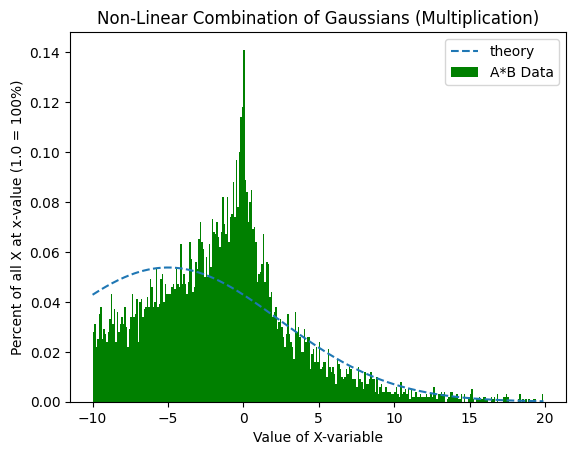

RMSD = 0.0150715385185818


In [774]:
bins, hAB = get_histogram(x, A*B, normalize=True)
μ = μ1 * μ2
σ = sqrt( μ**2 * ((σ1/μ1)**2 + (σ2/μ2)**2) )   ## error propagation here

plt.bar( bins , hAB/dx, label="A*B Data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ), linestyle="dashed", label="theory")
plt.xlabel("Value of X-variable")
plt.ylabel("Percent of all X at x-value (1.0 = 100%)")
plt.title("Non-Linear Combination of Gaussians (Multiplication)")
plt.legend()
plt.show()

print("RMSD = " + str(RMSD(Normal(bins, μ, σ), hAB/dx)))

The RMSD for these graphs is almost threefold that of the other experiments. I know this is a result of some code error earlier in this document, as in the solution set the exact same code has no problem resolving the histogram appropriately. Will have to address this code issue in conclusion, but the propagation of error (calculation of standard deviation) follows theoretically exactly.

# F = A/B

### go to the table: https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulae and implement one of the **non-linear** entries. Just like the previous 'experiments'. Note that you will be computing the relative error.

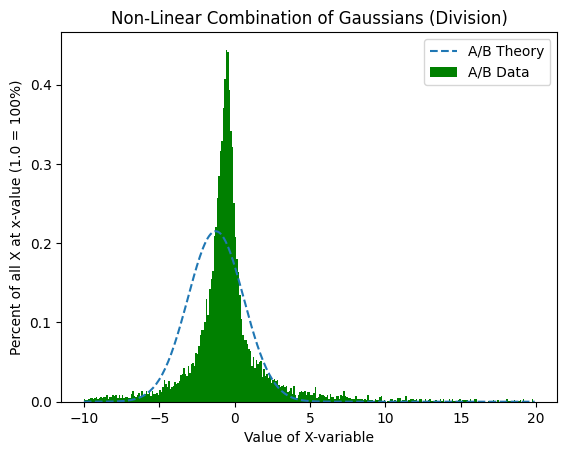

RMSD = 0.042880660676679574


In [775]:
bins, hAB = get_histogram(x, A/B, normalize=True)
μ = μ1/μ2
σ = sqrt( μ**2 * ((σ1/μ1)**2 + (σ2/μ2)**2) )   ## error propagation here

plt.bar( bins , hAB/dx, label="A/B Data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ), linestyle="dashed", label="A/B Theory")
plt.xlabel("Value of X-variable")
plt.ylabel("Percent of all X at x-value (1.0 = 100%)")
plt.title("Non-Linear Combination of Gaussians (Division)")
plt.legend()
plt.show()

print("RMSD = " + str(RMSD(Normal(bins, μ, σ), hAB/dx)))

The RMSD for this graph is back to the normal size, but the histogram is still off. Due to the several hours working on the previous histogram to no avail, I ended up choosing another very simple non-linear combination of functions. According to the reference list, the calculation for the standard deviation remains the same. Did not do anything fancy here due to the code issue, but theoretical result is as solid as the previous one was.

# Questions \& Conclusion

Conclusion: Keeping track of uncertainty in experimnental results is paramount. It is easy enough to understand the uncertainty for one theory and straightforwardly apply it to its result, but as multiple mathematical models interact to form one, how each of their margin of errrors compound is not so intuitive. Luckily, we have well-established relationships between uncertainties for both linear and non-linear combinations of functions.

The predictable nature of uncertainty held until I got to the non-linear combinations of functions, but by process of elimination I can tell that there is an issue with the histogram function, not the theory producer. Unfortunately, I was unable to find a way to fix it, even as I compared my code to the sample solution.

## Give a summary of what you did in this lab.

In this lab, I produced several Gaussian distributions to test the variance between theory and observation (all experiments starting with the second) with a histogram representing empirically derived data.

I also checked the relationship between Gaussians that are combinations of each other, and where graphically possible highlighted intuitive proofs of the well-established relationhsips between mean and standard deviation under trasnformation.

Finally, both of the above activities mean that I practiced keeping track of error propagation with linear and non-linear combinations of functions, whose physical corollaries are physical laws per the prompt. This is important as it ensures uncertainty is propetly kept track of.